## Shoulder Angle Estimatiion with Soft Sensing Shirt
**AC209a Final Project**<br/>
**Fall 2018**<br/>
**Group # 50:** Dabin Choe, Yichu Jin, Evelyn Park

# **EDA**

**2. Initial EDA**

The above matrices compare all the variables' variations among data taken from different subjects.

In [6]:
names = ['Asa','Ci','Con','M1','M2','Siv']
tests = ['A','B','C']
dfs = [[],[],[],[],[],[]]

for ind, name in enumerate(names):
    for number in range(1,4):
        for test in tests:
            file_dir = 'data/' + name + '_t' + str(number) + test + '.txt'
            dfs[ind].append(pd.read_csv(file_dir, header=None, names=['time','s1','s2','s3','s4','s5','s6','hf','ab','ir']).drop('time', axis=1))
    dfs[ind] = pd.concat(dfs[ind], ignore_index=True)

dfs_raw = dfs.copy
    
asa_df = dfs[0]
ci_df = dfs[1]
con_df = dfs[2]
m1_df = dfs[3]
m2_df = dfs[4]
siv_df = dfs[5]
names = ['asa_df','ci_df','con_df','m1_df','m2_df','siv_df']

In [7]:
def box_compare(var_name):
    plot_df = pd.concat([df[var_name] for df in dfs], axis=1)
    plot_df.columns = ['Sub1','Sub2','Sub3', 'Sub4', 'Sub5', 'Sub6']
    ax = sns.boxplot(data=plot_df)       
    ax.set_title('Ranges of '+ var_name, fontsize=20)
    ax.set_ylabel(var_name, fontsize=20)
    ax.tick_params(labelsize=20)
    plt.show();
        

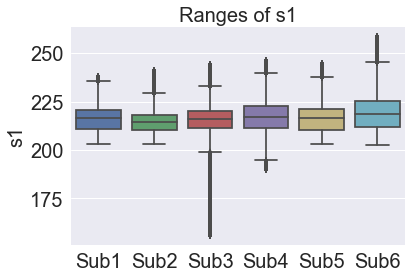

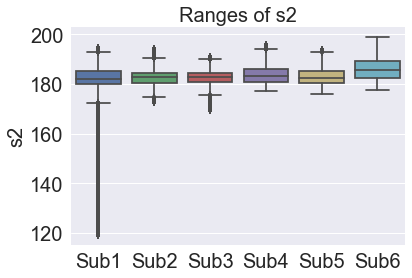

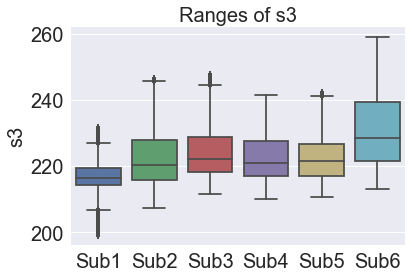

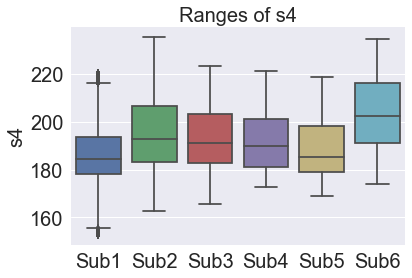

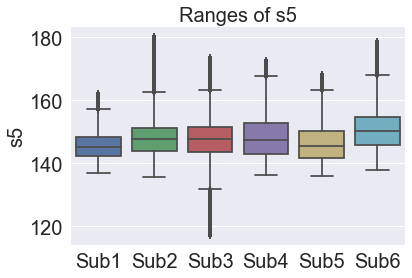

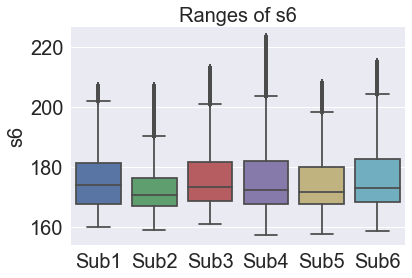

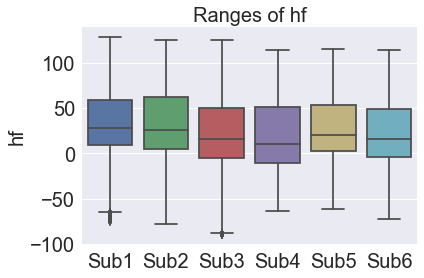

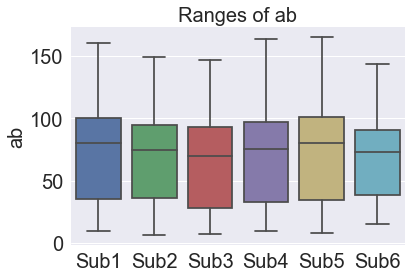

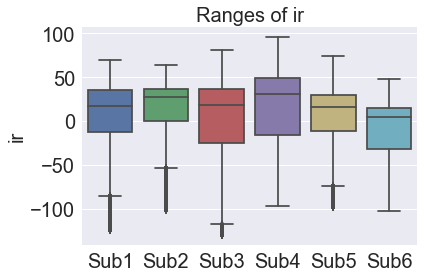

In [8]:

for var_name in asa_df.columns:
    box_compare(var_name)

#### Comment: 
As can be seen from plots above showing the values of the six embedded sensors for each of the six subjects, there are several outliers in the sensor outputs. The outliers on the lower ranges can be attributed to sensor
shorting due to shirt wrinkling during certain motions. The outliers on the higher ranges can be attributed
to occasional movement of the shirt and the sensor extreme positions during the random motion condition. 

In [14]:
# Load data: M1

tests = ['A','B','C']
appended_data = []
count = 0

for number in range(1,4):
    for test in tests:
        file_dir = 'data/M1_t' + str(number) + test + '.txt'
        data = pd.read_csv(file_dir, header=None, names=['t','s1','s2','s3','s4','s5','s6','hf','ab','ir'])
        appended_data.append(data)
        if count > 0:
            appended_data[count].t = appended_data[count].t + max(appended_data[count-1].t)
        count += 1
        
df = pd.concat(appended_data, ignore_index=True)

In [15]:
# Find observations with identical time stamp, 
sam_t_df = df[df['t'].duplicated(keep=False)]
sam_mocap_df = df[df[['hf','ab','ir']].duplicated(keep=False)]
sam_sen_df = df[df[['s1','s2','s3','s4','s5','s6']].duplicated(keep=False)]

In [16]:
def func(df):
    return np.max(df) - np.min(df)

In [17]:
sam_mocap_diff = []

for name, group in sam_mocap_df.groupby(['ab','ir','hf']):
    sam_mocap_diff.append([func(group.t), 
                           func(group.s1), func(group.s2), func(group.s3), 
                           func(group.s4), func(group.s5), func(group.s6)])
sam_mocap_diff = pd.DataFrame(sam_mocap_diff, columns=['time_diff','s1_diff','s2_diff',
                                                       's3_diff','s4_diff','s5_diff','s6_diff'])

In [18]:
sam_mocap_max_diff = []
for col in sam_mocap_diff.columns:
    sam_mocap_max_diff.append(np.max(sam_mocap_diff[col]))
sam_mocap_max_diff = pd.DataFrame(sam_mocap_max_diff, 
                                  index=['max time_diff','max s1_diff','max s2_diff',
                                         'max s3_diff','max s4_diff','max s5_diff','max s6_diff']).T
sam_mocap_max_diff

,max time_diff,max s1_diff,max s2_diff,max s3_diff,max s4_diff,max s5_diff,max s6_diff
0,0.01,0.01,0.0,0.01,0.01,0.01,0.01


In [19]:
sam_sen_diff = []
count = 0
for name, group in sam_sen_df.groupby(['s1','s2','s3','s4','s5','s6']):
    count += 1
    if count == 871:
        display(group)
    sam_sen_diff.append([count, func(group.t), func(group.ab), func(group.hf), func(group.ir)])
sam_sen_diff = pd.DataFrame(sam_sen_diff, columns=['count','time_diff','ab_diff','hf_diff','ir_diff'])


,t,s1,s2,s3,s4,s5,s6,hf,ab,ir
32248,193.260,211.93,179.47,229.24,210.19,154.54,167.86,-13.934,17.636,-40.091
32249,193.262,211.93,179.47,229.24,210.19,154.54,167.86,-13.920,17.638,-40.081
32250,193.270,211.93,179.47,229.24,210.19,154.54,167.86,-13.867,17.644,-40.046
32251,193.278,211.93,179.47,229.24,210.19,154.54,167.86,-13.832,17.648,-40.026
32252,193.281,211.93,179.47,229.24,210.19,154.54,167.86,-13.825,17.649,-40.024
32253,193.287,211.93,179.47,229.24,210.19,154.54,167.86,-13.812,17.652,-40.018
32254,193.295,211.93,179.47,229.24,210.19,154.54,167.86,-13.807,17.655,-40.022
32255,193.302,211.93,179.47,229.24,210.19,154.54,167.86,-13.811,17.660,-40.031
32256,193.303,211.93,179.47,229.24,210.19,154.54,167.86,-13.812,17.661,-40.033
32257,193.312,211.93,179.47,229.24,210.19,154.54,167.86,-13.827,17.668,-40.052


In [20]:
sam_sen_diff.iloc[sam_sen_diff.time_diff.idxmax]['count']

871.0

In [21]:
sam_sen_max_diff = []
for col in sam_sen_diff.columns:
    if col != 'count':
        sam_sen_max_diff.append(np.max(sam_sen_diff[col]))
sam_sen_max_diff = pd.DataFrame(sam_sen_max_diff, 
                                index=['max time_diff','max ab_diff',
                                       'max hf_diff','max ir_diff']).T
sam_sen_max_diff

,max time_diff,max ab_diff,max hf_diff,max ir_diff
0,0.093,1.45,3.5004,3.489


#### Comment:
To further investigate on the amount of sensor signal drift,
we calculated maximum MOCAP angle differences for the observations with identical sensor outputs.
The max difference in abduction is 1.45 degrees, in horizontal flexion is 3.50 degrees, and in internal
rotation is 3.49 degrees. These values could be viewed as the limitations of the hardware and the
thresholds for algorithm performance.